In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MaxAbsScaler

In [2]:
#the variable containing the path to the input gene expression data set to analyse
data = "F:\Students\Balamurugan\codes\output_step_old.csv"

In [3]:
df = pd.read_csv("F:\Students\Balamurugan\codes\\12.csv")
df.set_index('0',inplace=True)
dataset=df.transpose()


In [2]:
df = pd.read_excel("F:\Students\Balamurugan\codes\sample.xls")
dataset=df.transpose()

In [6]:
dataset.to_csv("NFKB.csv")

In [4]:
from sklearn.preprocessing import StandardScaler
# get the features and label from the original dataframe
# performing standardization
sc = StandardScaler()
X_scaled = sc.fit_transform(dataset)

Cumulative Variances (Percentage):
[10.03943942 15.65400036 20.19243647 23.73177595 26.74030506 29.19093171
 30.988232   32.65649658 34.22058934 35.57989096 36.76049722 37.89665882
 38.92419216 39.86420403 40.74240165 41.59255644 42.43724134 43.21030961
 43.95167766 44.69253536 45.38632386 46.04221503 46.67582215 47.29187116
 47.88386739 48.47000599 49.05414586 49.61291043 50.16564697 50.70787434
 51.21817582 51.72470171 52.22411015 52.7126695  53.19375208 53.66827887
 54.13853437 54.59637517 55.05159961 55.48230091 55.91118804 56.33007679
 56.74461987 57.14706354 57.54573587 57.94125502 58.32572676 58.70468205
 59.08086981 59.44900221 59.81167863 60.16999747 60.52346202 60.87500662
 61.2242805  61.56499991 61.89905645 62.23205166 62.5589335  62.88107175
 63.19423408 63.50643787 63.8140919  64.11985403 64.4204377  64.71818306
 65.01252259 65.30565868 65.59314202 65.87836105 66.16044048 66.43910613
 66.71604793 66.98908513 67.25870383 67.52673583 67.7917496  68.05386109
 68.31258134 68.

Text(0, 0.5, 'Explained variance (%)')

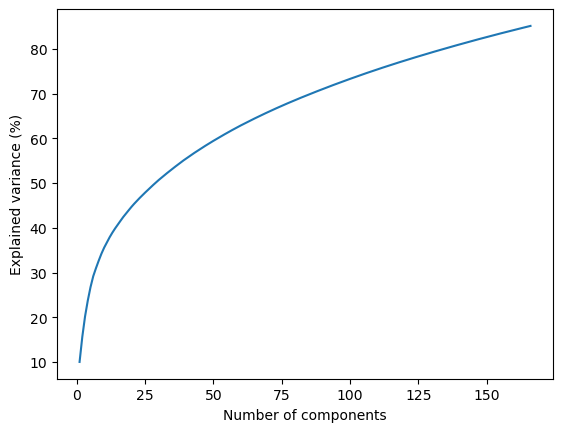

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.85)
pca.fit(X_scaled)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')
# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [7]:
pca_components = abs(pca.components_)
print(pca_components)

[[1.61447089e-04 4.65012694e-03 6.62406852e-04 ... 3.71096551e-03
  2.02517026e-03 4.27542860e-03]
 [1.29142717e-02 1.38494613e-03 3.58848017e-03 ... 1.91351001e-03
  9.15543791e-03 7.31632613e-03]
 [5.68500883e-03 1.78104103e-03 2.37840366e-03 ... 3.24392652e-03
  1.09887868e-02 7.82340192e-03]
 ...
 [4.65145776e-03 6.28387299e-03 6.44390207e-03 ... 4.71390598e-03
  1.09143342e-02 4.05187447e-03]
 [1.02097497e-02 1.39207461e-03 2.76731330e-03 ... 2.90897928e-03
  5.69690568e-03 7.09781767e-05]
 [8.79917092e-03 1.38424651e-03 4.54993078e-03 ... 2.95148198e-03
  3.70645997e-03 6.48498821e-03]]


In [8]:
print('Top 4 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)

    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]

    # print the top 4 feature names
    print(dataset.columns[indices].to_list())

Top 4 most important features in each component
['LOC100996668 /// ZEB1', 'MPDZ', 'FERMT2', 'AOC3']
['DHX9', 'RPAP3', 'DEFB118', 'ZNF644']
['CTSS', 'CDC42SE2', 'CARD16 /// CASP1', 'TNFSF10']
['FMO5', 'SH3BGRL2', 'LRRC66', 'LOC100652777 /// PLA2G10']
['AK026714 /// PELI1', 'RSL24D1', 'CTSA', 'LOC145474']
['SLC25A23', 'PCM1', 'RPS28', 'FRA10AC1']
['GLCCI1', 'IGHM', 'CD19', 'MAP4K1']
['B3GNT8', 'ASCL2', 'SNX24', 'EPHB2']
['MIRLET7D', 'TAF1D', 'NACA', 'HNRNPA1']
['LOC102725315 /// LOC727983 /// POM121L10P /// POM', 'PPM1B', 'KRMP1', 'GTF2H3']
['MOV10', 'PTPN21', 'THRB', 'SHISA5']
['SETDB2', 'C12orf10', 'MAP3K8', 'UBE2G2']
['ABCA5', 'EXOSC1', 'MYCL', 'EMG1']
['FMR1', 'IDH3G', 'SCNM1 /// TNFAIP8L2-SCNM1', 'FASTK']
['ZNF317', 'C8orf44-SGK3 /// SGK3', 'KLHDC8A', 'ZFAND5']
['ADRA2C', 'LHX1', 'CPLX2', 'LOC101928433']
['SNHG16 /// SNORD1A /// SNORD1C', 'LOC100996696 /// PABPC4', 'NOA1', 'MMS19']
['ZNF226', 'ZNF805', 'ZNF224', 'CIR1']
['KRT80', 'MTUS1', 'TMEM185A', 'FAM226A /// FAM226B']
['EXOC1',

In [9]:
X_pca = pca.transform(X_scaled)
print(X_pca.shape)
print(X_pca)

(300, 166)
[[-65.95722825  42.5693889  -24.79292367 ...  -4.19512396 -11.47757391
   -1.18098236]
 [-20.70206163  -6.41302474 -29.4838059  ...  -7.31633102   3.45816988
   -0.75346722]
 [-20.14492459   9.09208853 -24.00368493 ...  -3.8445171   -1.77662378
    3.18760351]
 ...
 [ -6.9063292   15.14079678  32.67105239 ...  -5.14751636   3.40760416
    7.7265745 ]
 [-26.51669994  49.31984313  10.66621128 ...   6.88544953 -12.45954115
   -5.36249169]
 [-13.4045951   67.27353938  -5.01316316 ...  -5.04711341  -3.64755784
    4.83603905]]


In [10]:
#definition and execution of the kmeans object 
kmeans=KMeans(n_clusters=6, init="k-means++", n_init=50, max_iter=500, random_state=78).fit(X_pca)

In [11]:
print(kmeans.labels_)

[2 5 2 2 5 2 2 1 2 1 1 5 4 4 4 4 5 5 2 1 5 5 2 2 1 1 5 1 2 1 1 5 5 5 0 5 5
 1 5 1 5 5 5 2 5 1 1 1 1 1 5 5 5 1 5 5 0 2 0 2 2 2 5 1 5 5 5 1 1 1 0 5 0 0
 5 1 0 1 2 5 1 0 5 0 1 0 1 1 5 1 1 1 5 2 0 1 2 5 1 4 2 5 1 4 5 5 5 1 5 1 1
 5 5 1 5 5 0 5 0 1 0 5 5 5 5 1 5 1 2 5 5 1 1 2 2 2 5 1 2 2 2 5 5 2 2 1 5 5
 5 2 4 1 1 5 5 2 1 0 3 2 3 5 3 3 2 2 3 1 1 3 4 4 3 5 3 5 5 1 3 5 1 4 2 1 1
 3 2 2 0 3 1 3 3 3 4 1 5 1 2 1 4 1 3 4 3 3 0 1 3 0 3 5 1 1 1 5 0 3 1 1 4 1
 5 2 2 1 2 3 2 2 2 3 2 2 5 2 2 2 4 0 3 1 4 2 5 5 3 3 1 2 2 1 2 1 1 2 1 5 1
 3 2 4 4 3 5 3 1 4 3 3 1 1 2 5 3 5 1 2 1 3 5 1 3 1 4 3 5 3 3 4 3 1 3 2 4 3
 5 3 3 3]


In [12]:
print(kmeans.cluster_centers_)

[[ 3.13290644e+00 -4.04805781e+01  5.37145024e+01 -4.21816561e+00
  -7.79768587e+00 -2.20213512e+01  2.21721028e+01  6.71257663e+00
  -3.82300085e+00 -5.95717869e+00  3.82083845e-01  4.99974807e+00
   1.30668757e+01  3.50631488e+00 -5.96561613e+00  6.25693608e+00
  -1.02178344e+00  5.44716716e+00 -1.33405485e+00 -2.29823092e+00
   1.69216954e+00 -5.73417783e+00  1.44041080e+00 -1.21160678e+00
   4.55518010e+00  6.37403061e+00 -3.47859606e+00 -2.91073816e+00
   2.46935343e+00  2.98337320e-01 -4.45021910e+00 -2.36245526e+00
  -7.66257115e-01  1.54497206e-01  5.57720776e-01 -4.26708303e-01
   7.81718506e-01  2.67554404e+00 -2.03478345e+00 -2.65749311e-02
   1.43657374e+00 -1.77978501e+00  9.01250541e-01  2.04283421e+00
   2.85117604e+00  1.72549632e+00 -2.67808561e+00  8.51543521e-01
   2.66701386e+00  5.92227712e-01  1.94626178e+00 -1.47373889e+00
   3.82127310e-01 -1.45849142e-01  2.12463469e+00 -6.32262110e-01
   4.73719437e-01  8.44157373e-01  2.75347529e+00  3.57420778e-01
   1.21175

In [16]:
data_frame = pd.DataFrame(X_pca)

data_frame['clusters'] = kmeans.labels_

data_frame.to_csv('6_166.csv')

In [15]:
#code to save the detected cluster as eps image
data_frame = pd.DataFrame(X_pca, columns=["X", "Y"])

data_frame['clusters'] = kmeans.labels_

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 6)) #
sns.scatterplot(
"X", "Y",
s=50,
data=data_frame,
hue="clusters",
palette="Set2")
lg = plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.savefig(fname='./clusters.eps',
            dpi=300,
            format='eps',
            bbox_extra_artists=(lg,),
            bbox_inches='tight')
plt.tight_layout()
plt.show()
data_frame.to_csv('6_modified.csv')

ValueError: Shape of passed values is (300, 148), indices imply (300, 2)